## Dataset Description
The dataset contains information on vehicles from GTA 5, including their pricing, performance, and classification. The key columns include:

| Column | Description |
|--------|-------------|
| Vehicle Name | Name of the vehicle in the game |
| Manufacturer | The company that produces the vehicle |
| Vehicle Class | Category of the vehicle (e.g., Super, Sports, Motorcycle) |
| Price (GTA$) | In-game price of the vehicle in GTA dollars |
| Top Speed (mph) | Maximum speed of the vehicle in miles per hour |
| Lap Time (Seconds) | Time taken by the vehicle to complete a standard lap |
| DLC / Release Update | Game update or downloadable content where the vehicle was introduced |


This dataset allows for an analysis of cost, performance, and class distribution of vehicles, highlighting patterns and trade-offs in vehicle selection.

## Objective of analysis
The analysis aims to explore the relationships between vehicle price, class, and performance, providing insights for players who want to optimize their choice of vehicles in GTA 5. Specifically, it seeks to:

1. Compare vehicle prices across classes to understand cost differences and identify premium vehicles.

2. Examine performance distributions (lap time and top speed) to identify the fastest vehicles and how they correlate with vehicle class.

3. Analyze relationships between price and performance to uncover whether higher-priced vehicles always offer better racing performance.

4. Provide data-driven insights to guide vehicle selection strategies for in-game racing or missions.

## Dataset Overview
### First 5 Rows
The `.head()` method allows us to preview the **first five rows** of the dataset and see the column names.

In [95]:
import pandas as pd

vehicle = pd.read_csv('/Users/chowjiahui/Documents/GWU/Data Visualisation/Homework/GTA 5 Vehicle Data Export - GTA 5 Vehicle Data Export.csv')

vehicle.head()

Rank Vehicle Name Manufacturer Vehicle Class Price (GTA$)  Top Speed (mph)  \
0     1      Krieger   Benefactor         Super   $2,875,000           127.25   
1     2       Emerus       Progen         Super   $2,750,000           127.25   
2     3    Itali GTO       Grotti        Sports   $1,965,000           127.75   
3     4  Buffalo EVX      Bravado        Muscle   $2,140,000           124.50   
4     5       Vagner   Dewbauchee         Super   $1,535,000           126.75   

  Lap Time (Seconds) DLC / Release Update  
0            0:59.27       Diamond Casino  
1            0:58.29       Diamond Casino  
2            0:59.72            Arena War  
3            1:03.46    San Andreas Mercs  
4            0:59.19           Gunrunning

### Dataset Structure

The `.info()` method provides a concise summary of the dataset, including the **data type of each column** and **non-null counts**, helping us identify missing values and data types.  
The `.shape` attribute shows the **number of rows and columns** in the dataset.

In [96]:
print(vehicle.info())
print(vehicle.shape)

<class 'pandas.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  50 non-null     int64  
 1   Vehicle Name          50 non-null     str    
 2   Manufacturer          50 non-null     str    
 3   Vehicle Class         50 non-null     str    
 4   Price (GTA$)          50 non-null     str    
 5   Top Speed (mph)       50 non-null     float64
 6   Lap Time (Seconds)    39 non-null     str    
 7   DLC / Release Update  50 non-null     str    
dtypes: float64(1), int64(1), str(6)
memory usage: 3.3 KB
None
(50, 8)


### Summary Statistics

The `.describe()` method provides **summary statistics** for each column, including measures like **count, mean, standard deviation, min, max**, and percentiles for numeric columns.  
To identify missing values in the dataset, we can use `.isna().sum()`, which shows the **number of missing values in each column**.

In [97]:
vehicle.describe(include="all")
print("Missing values by column:\n", vehicle.isna().sum())

Missing values by column:
 Rank                     0
Vehicle Name             0
Manufacturer             0
Vehicle Class            0
Price (GTA$)             0
Top Speed (mph)          0
Lap Time (Seconds)      11
DLC / Release Update     0
dtype: int64


## Exploratory Data Analysis
### Data Cleaning: Price Column

The `Price (GTA$)` column is originally stored as a **string** with `$` symbols and commas, which prevents numerical analysis.  
We need to **clean and convert it to numeric** for calculations, such as computing averages or plotting.


In [98]:
# Remove $ and commas, then convert to int
vehicle["Price_num"] = (
    vehicle["Price (GTA$)"]
      .str.replace("$", "", regex=False)
      .str.replace(",", "", regex=False)
      .astype(int)
)

### Average Price by Vehicle Class

To understand the **price differences between vehicle classes**, we calculate the **average price for each class** and sort them from highest to lowest.

In [99]:
# Calculate average price by vehicle class
avg_price_class = vehicle.groupby('Vehicle Class')['Price_num'].mean().reset_index()

# Sort by average price descending
avg_price_class = avg_price_class.sort_values('Price_num', ascending=False)

### Bar chart: Average Price by Vehicle Class

We use a bar chart to visualize the average price of vehicles in each class, helping to highlight which classes are premium and which are more affordable.

From the chart, we can see that Cycles have the highest average price, at `8 million GTA$`, while Motorcycles have the lowest average, approximately `1 million GTA$`. This illustrates the wide variation in vehicle costs across classes, providing players insight into which classes require a larger in-game investment.

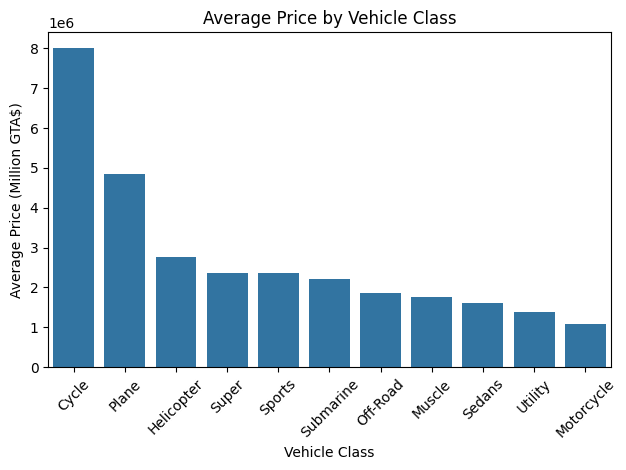

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn bar chart
sns.barplot(data=avg_price_class, x='Vehicle Class', y='Price_num')
plt.title('Average Price by Vehicle Class')
plt.ylabel('Average Price (Million GTA$)')
plt.xlabel('Vehicle Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Lap Time Preprocessing
Lap times were originally recorded in mm:ss.xx string format, which is not directly suitable for numerical analysis. To address this, a custom function was used to convert each lap time into total seconds (float). Invalid or missing values were safely handled by assigning NaN, which were subsequently removed.

After conversion, basic sanity checks were performed to confirm that the resulting lap times fell within a reasonable range and exhibited realistic summary statistics (minimum, maximum, mean, and standard deviation).

In [101]:
# Create function to convert mm:ss.xx format to total seconds (float)
def get_sec(time_str):
    try:
        m, s = time_str.split(":")
        return int(m) * 60 + float(s)
    except:
        return None  # For missing values

# Create new column with the converted lap times
vehicle["LapTime_sec"] = vehicle["Lap Time (Seconds)"].apply(get_sec)

s = pd.to_numeric(vehicle['LapTime_sec'], errors="coerce").dropna()
print(f"Series length after dropping NaNs: {len(s)}")

# Basic sanity checks
print("Min/Max:", float(s.min()), float(s.max()))
print("Mean/Std:", float(s.mean()), float(s.std(ddof=1)))

Series length after dropping NaNs: 39
Min/Max: 56.4 67.3
Mean/Std: 61.74641025641025 2.449721237824813


### Histogram Binning Method

The Freedman–Diaconis (FD) rule was used to determine the bin width for the lap time histogram. This method adapts the number of bins based on the data’s spread and sample size, making it more robust to skewness and outliers than fixed-width binning.

Using both NumPy’s implementation and a manual calculation for validation, the FD rule resulted in approximately 7–8 bins, with a computed bin width of about 1.8 seconds.

In [102]:
import numpy as np

# Freedman–Diaconis bin edges via NumPy
edges_fd = np.histogram_bin_edges(s, bins='fd')
print("FD edges count:", len(edges_fd))

# Also compute the FD bin count via the formula for illustration
q75, q25 = np.percentile(s, [75, 25])
iqr = q75 - q25
n = l.size
h = 2 * iqr * (n ** (-1/3)) if iqr > 0 else None
if h is not None and h > 0:
    approx_bins = int(np.ceil((l.max() - l.min()) / h))
    print("FD approx. bin count (manual):", approx_bins, "| h =", h)
else:
    print("IQR=0 (or too small); FD rule degenerates. Falling back to 20 bins.")
    edges_fd = np.histogram_bin_edges(l, bins=20)

FD edges count: 8
FD approx. bin count (manual): 7 | h = 1.7987672259616492


### Histogram Bin Validation

After computing the Freedman–Diaconis bin edges, the histogram counts were generated using NumPy’s histogram function. Inspecting the resulting bin counts and edges confirmed that observations were distributed sensibly across bins, with no empty or excessively dense intervals dominating the distribution.

This validation step ensures that the histogram accurately represents the underlying lap time data and that the chosen binning strategy produces a stable and interpretable visualization.

In [103]:
counts_fd, edges_fd_used = np.histogram(l, bins=edges_fd)
print("Counts (first 10):", counts_fd[:10])
print("Edges (first 10): ", edges_fd_used[:10])

Counts (first 10): [ 2  5  8 11  7  3  3]
Edges (first 10):  [56.4        57.95714286 59.51428571 61.07142857 62.62857143 64.18571429
 65.74285714 67.3       ]


### Histogram: Lap Time Distribution by Vehicle class

We use a stacked histogram to examine the relative performance of vehicles by class, focusing on lap times. This helps us understand which classes are fastest and how performance varies within and between classes.

1. `dropna(subset=['LapTime_sec'])` removes vehicles with missing lap times to avoid plotting errors.
2. `sns.histplot(..., hue='Vehicle Class', multiple='stack')` stacks vehicle counts by class for easy comparison.
3. `bins=edges_fd` applies the Freedman-Diaconis rule to choose a reasonable number of bins.

The histogram shows clear performance patterns across vehicle classes. Motorcycles are the fastest `(~56–59s)`, followed by Supercars `(~58–63s)` and Sports cars `(~59–65s)`, while Muscle cars and Sedans are slower. Notably, Supercars and Sports cars overlap, indicating that high-end Sports cars can rival lower-end Supercars, but Motorcycles stand apart with a clear advantage. Supercars are consistent, Sports cars are variable, and slower classes like Sedans show higher lap times.

This highlights the trade-off between class, speed, and consistency, guiding vehicle selection for racing.

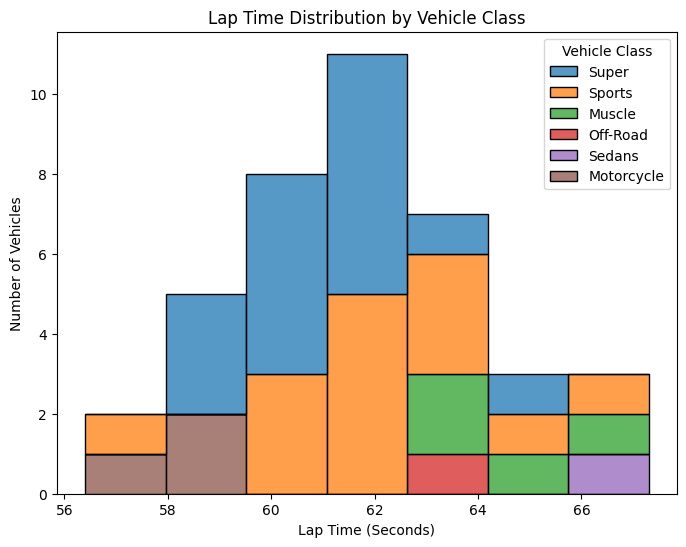

In [104]:
# Drop rows with missing Lap Time
vehicle_clean = vehicle.dropna(subset=['LapTime_sec'])

plt.figure(figsize=(8, 6))
sns.histplot(data=vehicle_clean, x='LapTime_sec', hue='Vehicle Class', multiple='stack', palette='tab10', bins=edges_fd)
plt.title('Lap Time Distribution by Vehicle Class')
plt.xlabel('Lap Time (Seconds)')
plt.ylabel('Number of Vehicles')
plt.show()

### Scatter plot: Top Speed vs Lap Time
We use a scatter plot to examine the relationship between top speed and lap time. Each point represents a vehicle, colored by Vehicle Class.

The scatter plot shows a general downward trend, meaning vehicles with higher top speeds tend to have lower lap times. While exceptions exist due to handling and weight (e.g., a Sports car outlier at extreme top speed), Supercars and Motorcycles cluster in the high-speed, low-lap-time region, while slower classes like Sedans and Muscle cars appear in the lower-speed, higher-lap-time region.

Top speed is a strong indicator of performance, but class and handling also influence lap times, guiding players in choosing vehicles for racing efficiency.

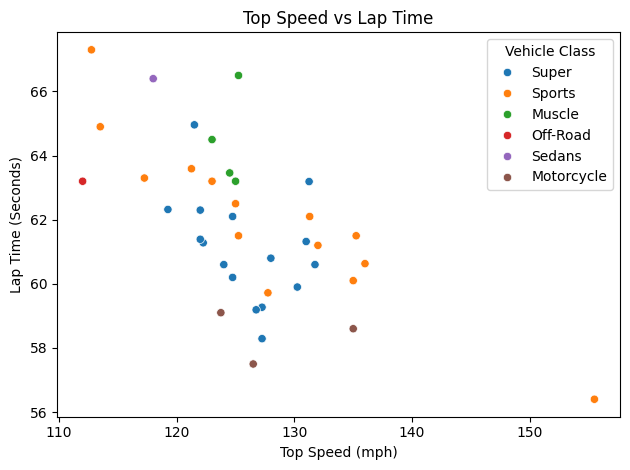

In [105]:
ax = sns.scatterplot(data=vehicle_clean, x="Top Speed (mph)", y="LapTime_sec", hue="Vehicle Class")
ax.set(title="Top Speed vs Lap Time", xlabel="Top Speed (mph)", ylabel="Lap Time (Seconds)")
plt.tight_layout()
plt.show()

## Reflection

One key insight from this analysis is that **Motorcycles stand out as the best choice**, offering both the **lowest average price** and the **fastest lap times**, making them ideal for players who want speed without spending heavily in-game. Higher-priced classes like Supercars also perform well but come at a greater cost. A limitation of the dataset is that **some lap times are missing**, which reduces the sample size for certain classes and may slightly affect the accuracy of performance comparisons across all vehicles.
